# Excersise in beta calculation using FRED API
In the following jupyter notebook I am looking at possibility of calculating beta (volatility measure) for US govt. bonds

In [183]:
import numpy as np
import requests
import pandas as pd
from fred_key import fred_key
import matplotlib.pyplot as plt

In [46]:
api_key = fred_key

In [0]:
# Define the FRED API endpoint
base_url = 'https://api.stlouisfed.org/fred/'

'''
Get observation data from the FRED API
'''

# Assign endpoint
obs_endpoint = 'series/observations'

In [47]:
# Assign parameters
series_id = 'SP500'
start_date = '2013-11-11'
end_date = '2023-11-13'
ts_frequency = 'd'
ts_units = 'pc1'

In [70]:
obs_params = {
    'series_id': series_id,
    'api_key': api_key,
    'file_type': 'json',
    'observation_start': start_date,
    'observation_end': end_date,
    # 'frequency': ts_frequency
    # 'units': ts_units
}

# Make request to FRED API
response = requests.get(base_url + obs_endpoint, params=obs_params)

In [71]:
# Format data
if response.status_code == 200:
    res_data = response.json()
    obs_data = pd.DataFrame(res_data['observations'])
    obs_data['date'] = pd.to_datetime(obs_data['date'])
else:
    print('Failed to retrieve data. Status code:', response.status_code)
    

In [72]:
SP500 = obs_data.drop(['realtime_start','realtime_end'], axis = 1)

In [158]:
temp1= np.array(SP500['value'])

In [159]:
idx = np.array([])
for i, n in enumerate(temp1):
    if n == '.':
        idx = np.append(idx, i)
idx = idx.astype(int)
temp1 = np.delete(temp1,idx)

In [160]:
temp1 = temp1.astype(float)

In [94]:
temp2= temp1[1:]
temp3= temp1[:-1]

In [99]:
SP500 = SP500.drop(0,axis=0)

In [223]:
SP500['returnSP500S'] = (temp3-temp2)/temp3*100*365/12
SP500['returnSP500L'] = (temp1 - temp1[0])/temp1[0]*100

In [224]:
series_id = 'DGS10'
start_date = '2013-11-11'
end_date = '2023-11-13'
ts_frequency = 'd'
ts_units = 'pc1'

obs_params = {
    'series_id': series_id,
    'api_key': api_key,
    'file_type': 'json',
    'observation_start': start_date,
    'observation_end': end_date,
    # 'frequency': ts_frequency
    # 'units': ts_units
}

In [225]:
# Make request to FRED API
response = requests.get(base_url + obs_endpoint, params=obs_params)
# Format data
if response.status_code == 200:
    res_data = response.json()
    obs_data = pd.DataFrame(res_data['observations'])
    obs_data['date'] = pd.to_datetime(obs_data['date'])
else:
    print('Failed to retrieve data. Status code:', response.status_code)

In [226]:
bonds = obs_data

In [227]:
temp4 = np.array(bonds['value'])
idx = np.array([])
for i, n in enumerate(temp4):
    if n == '.':
        idx = np.append(idx, i)
idx = idx.astype(int)
temp4 = np.delete(temp4,idx)
temp4 = temp4.astype(float)

In [228]:
bonds = bonds.drop(idx, axis=0)

In [229]:
#bonds = bonds.drop(['realtime_start','realtime_end','value'], axis = 1)
bonds['value_B10'] = temp4

In [230]:
final = pd.merge(SP500, bonds, on='date', how = 'right')

In [232]:
rm = np.array(final['returnSP500S'])
rm = rm.astype(float)

In [233]:
re = np.array(final['value_B10'])
re = re.astype(float)

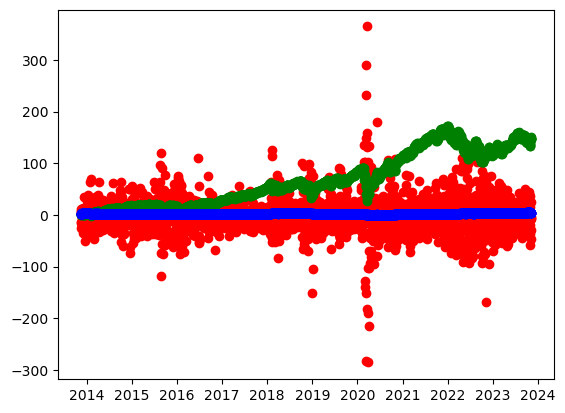

In [243]:
plt.scatter(final['date'],final['returnSP500S'], color='r')
plt.scatter(final['date'],final['returnSP500L'], color='g')
plt.scatter(final['date'],final['value_B10'], color='b')

In [240]:
cov = final.cov(min_periods=None, ddof=1, numeric_only=True)

In [247]:
var1 = final['returnSP500S'].var(axis=0, skipna=True, ddof=1, numeric_only=False)
var2= final['returnSP500L'].var(axis=0, skipna=True, ddof=1, numeric_only=False)

In [248]:
cov['returnSP500S']/var1

return          0.032877
returnSP500S    1.000000
returnSP500L   -0.022223
value_B10       0.000433
Name: returnSP500S, dtype: float64

In [249]:
cov['returnSP500S']/var2

return          0.014935
returnSP500S    0.454278
returnSP500L   -0.010095
value_B10       0.000197
Name: returnSP500S, dtype: float64